In [2]:
# Round1: Remove words in the [], because those words are not part of lyrics
import re
cleaned = []
txt = list(df['total_verse'])
for i  in txt:
    cleaned.append(re.sub('\[.*?\]', '', i))
#print(txt)
df['round1'] = cleaned

In [3]:
# Round2: Remove punctuation: "," , "'", "..."
df['round2']=df['round1'].str.replace('[^\w\s]','')
#print(df['round2'])

/Users/XXXXX/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [4]:
# Round3: We notice some lyrics are constructed like "meThen", "beforeLaying".
        # To solve this problem, we put a space in front of every capital letter. 
df['round3'] = df['round2'].str.replace( r"([A-Z])", r" \1").str.strip()
#print(df['round3'])

/Users/XXXXX/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
# Round4: We lowercase the capitalized words
df ['round4']= df['round3'].str.lower()
#print (df['round4'])

In [6]:
import spacy
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
allow_postags = set(['NOUN', 'VERB', 'ADJ', 'ADV', 'PROPN'])
nlp = spacy.load('en_core_web_sm')

In [10]:
# Round5: Remove stopwords and lemmatization 
txt2=list(df['round4'])
join_words_list=[]
for element in txt2:
    words=nlp(element)
    words_list=[]
    for token in words:
        if token.text not in stop_words and token.pos_ in allow_postags:
            words_list.append(token.lemma_)
    for word in words_list:
        join_words =' '.join(words_list)
    join_words_list.append(join_words)

df['round5']=join_words_list
#print(df.head)


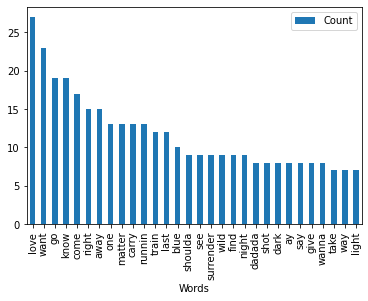

In [16]:
# Visualization 
# Plot 30 most commonly used words in a bar chat
import matplotlib.pyplot as plt
text=" ".join(df['round5']).split()
df1=pd.Series(text).value_counts()[:30]
df2 = df1.reset_index()
df2.columns = ['Words', 'Count']

df2.plot(x='Words', y='Count', kind = 'bar')
#plt.show()
plt.savefig('words_count.png')

In [17]:
df.to_csv('sob_rock_parsed.csv', index=False, encoding = 'utf-8-sig')

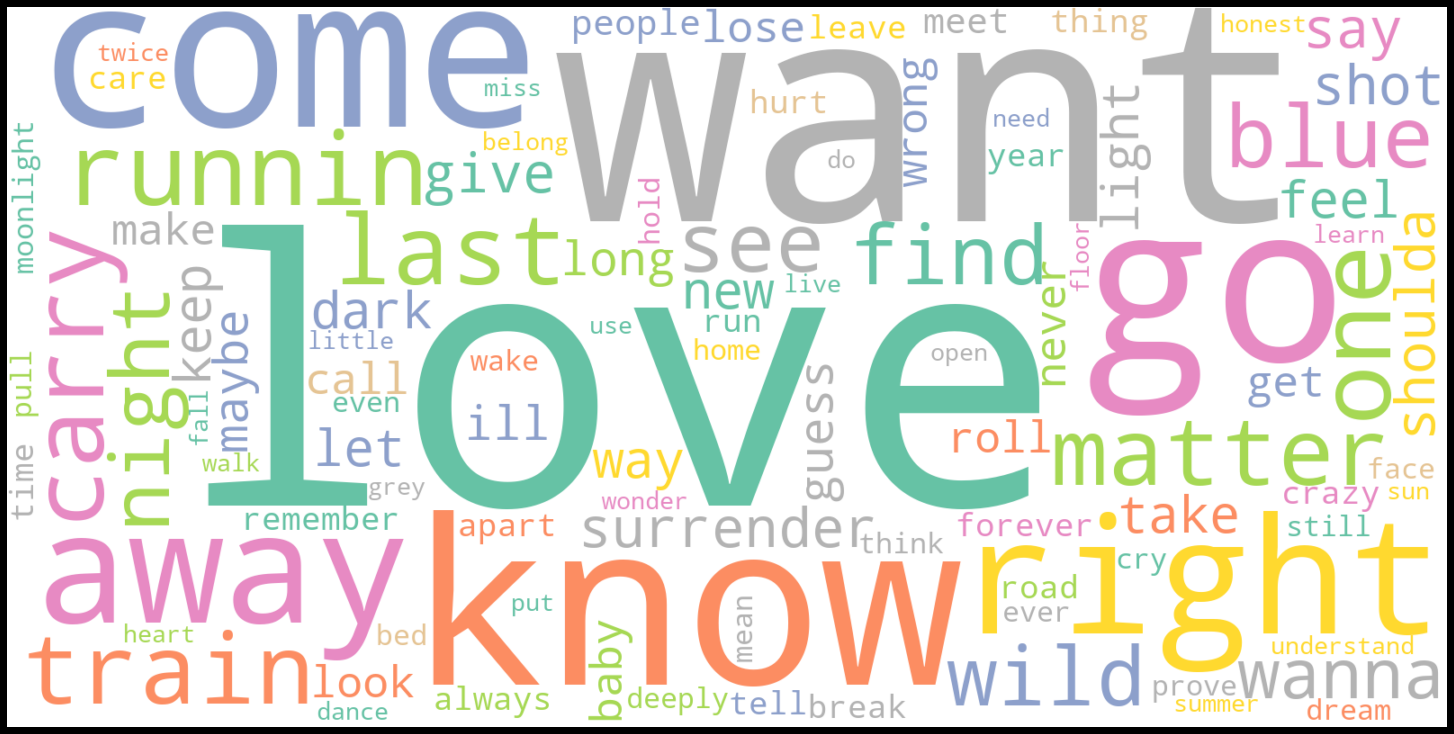

In [27]:
# Wordclouds
from wordcloud import WordCloud , ImageColorGenerator
import numpy as np


# Read the text
data_file = pd.read_csv('sob_rock_parsed.csv')

# Create stopwords list: 
stopwords = ["dadada","ay"]

# Build a wordcloud
wordcloud = WordCloud(collocations=False, stopwords=stopwords, max_words=100, width=1600 , height=800,background_color="White",colormap="Set2").generate(''.join(data_file['round5']))
plt.figure(figsize=(20,10),facecolor='k')
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout (pad=0)

#saving the image of wordcloud
wordcloud.to_file ('sob_rock.png')
plt.show()